In [1]:
import numpy as np
import pandas as pd
import scipy
import os
import math
import matplotlib.pyplot as plt

import functools

from sklearn.model_selection import StratifiedKFold, cross_validate

from sklearn import decomposition

from sklearn.cluster import KMeans,DMeans
from QuantumUtility.Utility import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv('kddcup.data_10_percent_corrected',header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0,normal.


In [3]:

obj_df = df.select_dtypes(include=['object']).copy()

obj_df[1] = obj_df[1].astype('category')
obj_df[2] = obj_df[2].astype('category')
obj_df[3] = obj_df[3].astype('category')
#obj_df[41] = obj_df[41].astype('category')

In [4]:
d1 = dict(enumerate(obj_df[1].cat.categories))

d2 = dict(enumerate(obj_df[2].cat.categories))

d3 = dict(enumerate(obj_df[3].cat.categories))



d1
d2
d3

{0: 'OTH',
 1: 'REJ',
 2: 'RSTO',
 3: 'RSTOS0',
 4: 'RSTR',
 5: 'S0',
 6: 'S1',
 7: 'S2',
 8: 'S3',
 9: 'SF',
 10: 'SH'}

In [5]:
df_=df.copy()

In [4]:
df[1] = obj_df[1].cat.codes
df[2] = obj_df[2].cat.codes
df[3] = obj_df[3].cat.codes



In [5]:
df1_ = df.drop(columns=41)
df1_

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,1,22,9,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0
1,0,1,22,9,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0
2,0,1,22,9,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0
3,0,1,22,9,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0
4,0,1,22,9,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0
5,0,1,22,9,217,2032,0,0,0,0,...,59,59,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0
6,0,1,22,9,212,1940,0,0,0,0,...,1,69,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0
7,0,1,22,9,159,4087,0,0,0,0,...,11,79,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0
8,0,1,22,9,210,151,0,0,0,0,...,8,89,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0
9,0,1,22,9,212,786,0,0,0,1,...,8,99,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0


In [6]:
scaler = MinMaxScaler()
for (columnName, columnData) in df1_.iteritems():
    df1_[columnName] = scaler.fit_transform(df1_[[columnName]])
df1_

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.5,0.338462,0.9,2.610418e-07,0.001057,0.0,0.0,0.0,0.000000,...,0.035294,0.035294,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0
1,0.0,0.5,0.338462,0.9,3.446905e-07,0.000094,0.0,0.0,0.0,0.000000,...,0.074510,0.074510,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0
2,0.0,0.5,0.338462,0.9,3.389216e-07,0.000259,0.0,0.0,0.0,0.000000,...,0.113725,0.113725,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0
3,0.0,0.5,0.338462,0.9,3.158461e-07,0.000259,0.0,0.0,0.0,0.000000,...,0.152941,0.152941,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0
4,0.0,0.5,0.338462,0.9,3.129617e-07,0.000394,0.0,0.0,0.0,0.000000,...,0.192157,0.192157,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0
5,0.0,0.5,0.338462,0.9,3.129617e-07,0.000394,0.0,0.0,0.0,0.000000,...,0.231373,0.231373,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0
6,0.0,0.5,0.338462,0.9,3.057506e-07,0.000376,0.0,0.0,0.0,0.000000,...,0.003922,0.270588,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0
7,0.0,0.5,0.338462,0.9,2.293129e-07,0.000793,0.0,0.0,0.0,0.000000,...,0.043137,0.309804,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0
8,0.0,0.5,0.338462,0.9,3.028661e-07,0.000029,0.0,0.0,0.0,0.000000,...,0.031373,0.349020,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0
9,0.0,0.5,0.338462,0.9,3.057506e-07,0.000152,0.0,0.0,0.0,0.033333,...,0.031373,0.388235,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0


# Polynomial Expansion

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
p = PolynomialFeatures(degree=2).fit_transform(df1_)


In [21]:
f = pd.DataFrame(p)
f

,0,1,2,3,4,5,6,7,8,9,...,893,894,895,896,897,898,899,900,901,902
0,1.0,0.0,0.5,0.338462,0.9,2.610418e-07,0.001057,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0
1,1.0,0.0,0.5,0.338462,0.9,3.446905e-07,0.000094,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0
2,1.0,0.0,0.5,0.338462,0.9,3.389216e-07,0.000259,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0
3,1.0,0.0,0.5,0.338462,0.9,3.158461e-07,0.000259,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0
4,1.0,0.0,0.5,0.338462,0.9,3.129617e-07,0.000394,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0
5,1.0,0.0,0.5,0.338462,0.9,3.129617e-07,0.000394,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0
6,1.0,0.0,0.5,0.338462,0.9,3.057506e-07,0.000376,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0
7,1.0,0.0,0.5,0.338462,0.9,2.293129e-07,0.000793,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0
8,1.0,0.0,0.5,0.338462,0.9,3.028661e-07,0.000029,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0
9,1.0,0.0,0.5,0.338462,0.9,3.057506e-07,0.000152,0.0,0.0,0.0,...,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0


In [7]:
df1_.isnull().values.any()

False

In [10]:
X_mean0 = np.array(df1_ - np.mean(df1_, axis = 0))

U, E, V = np.linalg.svd(X_mean0, full_matrices=False)
E2 = np.array([pow(e,2) for e in E]) # Computing the powers of 2
E3_ = E2/np.sum(E2)

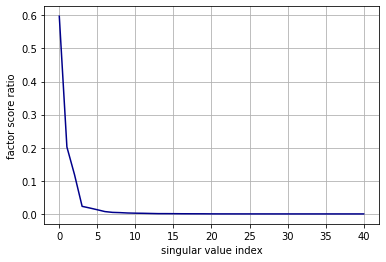

In [11]:
#### Distribution of the factor score ratios
plt.plot(E3_, color="darkblue")
plt.grid()
plt.xlabel("singular value index")
plt.ylabel("factor score ratio")
plt.savefig('MNIST_sv_distribution.pdf', bbox_inches='tight')

In [12]:
i=0
real_exp_var = 0

while real_exp_var <= 0.85:
    real_exp_var += E3_[i]
    i += 1
real_k = i
real_k

3

In [11]:
pca = decomposition.PCA(svd_solver="full",n_components=1)

pca_model = pca.fit_transform(df1_)
pca_model

array([[0.47478448],
       [0.48268036],
       [0.47639648],
       ...,
       [0.27138033],
       [0.19957361],
       [0.12776903]])

In [12]:
pca_model.shape


(494021, 1)

In [2]:
from sklearn.metrics import calinski_harabaz_score as CH

In [14]:
kmeans = KMeans(n_clusters=10,n_jobs=-1).fit(pca_model)

result = CH(pca_model, kmeans.labels_)

In [15]:
result

85688969.61410673

10
20
30
40
50
60
70
80
90
100


<BarContainer object of 10 artists>

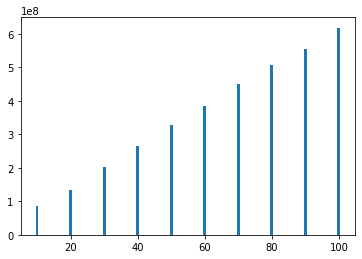

In [45]:
result = []
k = []
for i in np.arange(10,110,10):
    print(i)
    kmeans = KMeans(n_clusters=i,n_jobs=-1).fit(pca_model)
    k.append(i)
    result.append(CH(pca_model, kmeans.labels_))

plt.bar(k,result)
#plt.axhline(y=0.5)


# Qpca + Kmeans

In [3]:
q_array = np.load('qpcakdd1.npy')

In [4]:
len(q_array)

494021

In [5]:
kmeans = DMeans(n_clusters=10,algorithm='full',delta=0.05,tol=1e-2).fit(q_array)



In [6]:
result = CH(q_array, kmeans.labels_)

print(result)

2.139791670167079


In [10]:
import dask.array as da

In [13]:
matrice = np.array(([1,2,3],[4,5,6],[6,7,8],[9,10,11]))
xx = da.from_array(matrice, chunks=(1, matrice.shape[1]))
xx

dask.array<array, shape=(4, 3), dtype=int64, chunksize=(1, 3), chunktype=numpy.ndarray>